#  Тестовое задание. Бондарев Дмитрий. Задача 3 

**ЗАДАЧА**: Проанализировать данные и поискать в них интересные инсайты, построить графики.
Инструменты: jupyter notebook или excel + отчет в pdf

**Переменные, характеризующие кредитную историю клиента:**

● cred_sum_cc_all - сумма кредитов по кредитным картам

● mfo_inqs_count_month - количество запросов на кредиты в другие в МФО

● all_closed_creds_sum_all - сумма закрытых кредитов

● bank_inqs_count_quarter - количество запросов на кредиты в банки

● cred_max_overdue_max_ly - максимальная просрочка за год

● all_active_creds_sum_all - денежная сумма всех активных кредитов

● mfo_last_days_all - Количество дней с последнего займа в МФО

● cred_sum_cc_ly - Сумма лимитов кредитных карт, оформленных за последний
год

● cred_sum_debt_all_all - Сумма задолженности по всем кредитам

● all_closed_creds_sum_ly - Сумма закрытых кредитов за последний год

● mfo_cred_mean_sum_3lm - Средняя сумма МФО кредитов, выданных за
последние 3 месяца

● delay_more_sum_all - Количество просрочек более чем на 90 дней по всем
кредитам

● all_creds_count_all - Общее количество кредитов

● cred_day_overdue_all_sum_all - Суммарное количество дней просрочки текущих активных кредитов

● cred_max_overdue_max_3lm - Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца

● mfo_closed_count_ly - Количество закрытых МФО кредитов, взятых за последний год

● cred_sum_overdue_cc_all - Сумма просрочек по кредитным картам

● count_overdue_all_3lm - Количество кредитов на просрочке, взятых за последние 3 месяца

● all_creds_count_lm - Количество кредитов, взятых за последний месяц

● region - регион подачи заявки

**Переменные характеризующие клиента**

● work_code - Профессия. 5 - рабочие профессии (слесарь, токарь). 3 - офисный
работник (бухгалтер, программист). 1 - госслужащий (полицейский, медсестра)

● month_income - доход

Целевые переменные:
bad - 1 - кредит просрочен, 0 - кредит возвращен, nan - отказ.

approved - 1 - одобрено, 0 - отказано.

## Загрузка данных

In [1]:
pip install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive 
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier

In [3]:
drive.mount("/content/google_drive")

Drive already mounted at /content/google_drive; to attempt to forcibly remount, call drive.mount("/content/google_drive", force_remount=True).


In [4]:
!ls /content/google_drive/MyDrive/data/

forFBpost.csv


## Анализ данных

In [5]:
data = pd.read_csv('/content/google_drive/MyDrive/3_task_data.csv')
data.head()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.0,0,0.0,2,3,529,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,0,0.0,10,3,0,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,0,0.0,18,4,0,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,0,0.0,8,5,0,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.0,0,0.0,11,1,0,0.0,0,0.00,0,0,5,35000,34,NaN,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      23116 non-null  int64  
 1   cred_sum_cc_all               23116 non-null  float64
 2   mfo_inqs_count_month          23116 non-null  int64  
 3   all_closed_creds_sum_all      23116 non-null  int64  
 4   bank_inqs_count_quarter       23116 non-null  int64  
 5   cred_max_overdue_max_ly       23116 non-null  float64
 6   all_active_creds_sum_all      23116 non-null  int64  
 7   mfo_last_days_all             23116 non-null  int64  
 8   cred_sum_cc_ly                23116 non-null  float64
 9   cred_sum_debt_all_all         23116 non-null  float64
 10  all_closed_creds_sum_ly       23116 non-null  int64  
 11  mfo_cred_mean_sum_3lm         23116 non-null  float64
 12  delay_more_sum_all            23116 non-null  int64  
 13  a

In [7]:
data.describe()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
count,2.311600e+04,2.311600e+04,23116.000000,2.311600e+04,23116.000000,2.311600e+04,2.311600e+04,23116.000000,23116.000000,2.311600e+04,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,7269.000000,23116.000000
mean,6.060602e+06,4.424794e+04,1.284262,1.653574e+05,3.760642,4.070925e+03,1.284212e+05,2615.988925,10672.104919,8.414683e+04,3.006949e+04,4228.567470,5.084487,11.403876,259.105944,1107.137568,3.474087,4.878172e+03,0.118576,1.080637,3.433250,39363.189998,47.632203,0.270051,0.314458
std,3.678480e+05,1.006016e+05,2.373415,4.788942e+05,5.057107,2.689042e+04,3.890718e+05,4228.621029,37246.943546,3.054724e+05,1.021166e+05,8216.632710,11.628365,18.543562,768.039823,7073.931364,9.202313,3.793714e+04,0.466854,2.137757,1.370812,13887.644526,27.615823,0.444016,0.464310
min,5.498546e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.739749e+06,0.000000e+00,0.000000,3.000000e+03,0.000000,0.000000e+00,2.000000e+03,13.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,35000.000000,25.000000,0.000000,0.000000
50%,6.020794e+06,5.000000e+03,0.000000,3.083450e+04,2.000000,0.000000e+00,1.500000e+04,83.500000,0.000000,5.000000e+03,0.000000e+00,1000.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000,35000.000000,46.000000,0.000000,0.000000
75%,6.445488e+06,4.972685e+04,2.000000,1.357758e+05,5.000000,3.000000e+03,7.500000e+04,2070.500000,0.000000,3.496056e+04,2.000000e+04,6266.754762,5.000000,13.000000,70.000000,0.000000,3.000000,0.000000e+00,0.000000,1.000000,5.000000,50000.000000,70.000000,1.000000,1.000000
max,6.697265e+06,5.739786e+06,25.000000,3.030997e+07,67.000000,1.914581e+06,1.200000e+07,9999.000000,878000.000000,1.150825e+07,4.929320e+06,315200.000000,171.000000,546.000000,15327.000000,673495.420000,344.000000,2.878197e+06,10.000000,48.000000,5.000000,65000.000000,99.000000,1.000000,1.000000


In [8]:
#Проверим на дубликаты:
data.duplicated().unique()

array([False])

In [9]:
data['approved'].value_counts()

0    15847
1     7269
Name: approved, dtype: int64

In [10]:
data['bad'].value_counts()

0.0    5306
1.0    1963
Name: bad, dtype: int64

In [11]:
data['month_income'].max()

65000

In [12]:
data['work_code'].value_counts()

5    7747
2    4881
3    4834
4    3570
1    2084
Name: work_code, dtype: int64

Датасет с одобренным и неодобренным кредитом соответственно:

In [13]:
data_app_T = data.query('approved == 1')
data_app_F = data.query('approved == 0')

С просроченым и возвращённым кредитом соответственно:

In [14]:
data_bad_T = data_app_T.query('bad == 1')
data_bad_F = data_app_T.query('bad == 0')

In [15]:
def plot_hist(data,col,a,b):
    plt.figure(figsize=(15,5))
    data[col].plot(kind='hist', alpha = 0.5, bins = 100, range=(a, b))

Text(0.5, 0, 'Средняя сумма МФО кредитов, выданных за последние 3 месяца')

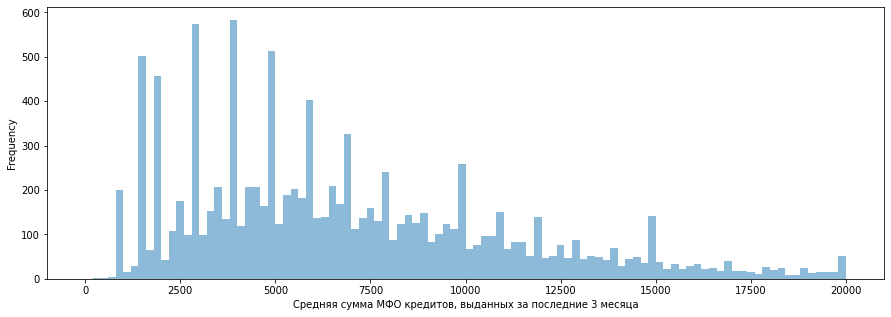

In [16]:
plot_hist(data,'mfo_cred_mean_sum_3lm',1,20000)
plt.xlabel('Средняя сумма МФО кредитов, выданных за последние 3 месяца')

Text(0.5, 0, 'Общее количество кредитов')

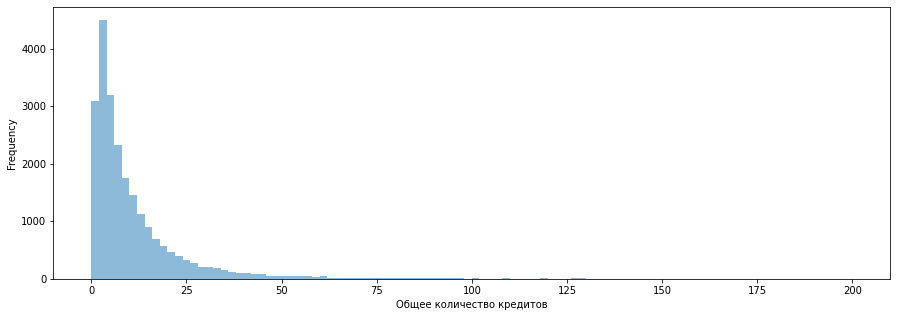

In [17]:
plot_hist(data,'all_creds_count_all',0,200)
plt.xlabel('Общее количество кредитов')

In [18]:
##Размер среднего кредита, взятого в МФО:
data.query('0<mfo_cred_mean_sum_3lm < 20000')['mfo_cred_mean_sum_3lm'].mean()

6836.921081200022

In [19]:
##Медиана:
data.query('0<mfo_cred_mean_sum_3lm < 20000')['mfo_cred_mean_sum_3lm'].median()

6000.0

Text(0.5, 0, 'Cумма закрытых кредитов')

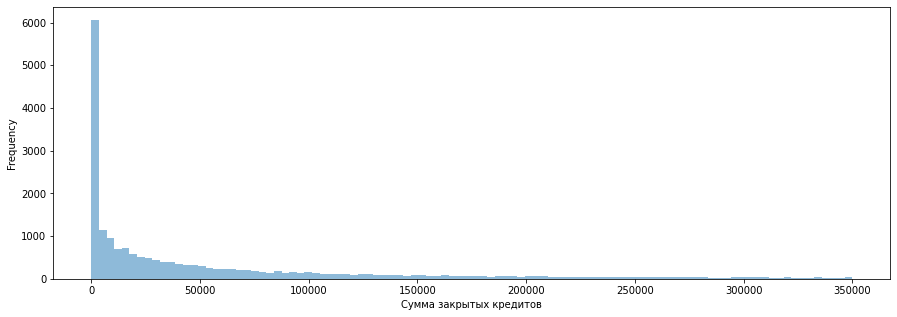

In [20]:
plot_hist(data,'all_closed_creds_sum_all',0,350000)
plt.xlabel('Cумма закрытых кредитов')

Количество одобренных/отказанных кредитов у клиентов без кредитной истории:

In [21]:
data.query('all_closed_creds_sum_all == 0')['approved'].value_counts()

0    4533
1     430
Name: approved, dtype: int64

Количество одобренных/отказанных кредитов у клиентов с кредитной историей:

In [22]:
data.query('all_closed_creds_sum_all > 0')['approved'].value_counts()

0    11314
1     6839
Name: approved, dtype: int64

Количество одобренных/отказанных кредитов у клиентов без задержки выплат кредита:

In [23]:
data.query('cred_day_overdue_all_sum_all == 0')['approved'].value_counts()

0    8684
1    6362
Name: approved, dtype: int64

Количество одобренных/отказанных кредитов у клиентов с задержкой выплаты кредита больше одного дня:

In [24]:
data.query('cred_day_overdue_all_sum_all > 0')['approved'].value_counts()

0    7163
1     907
Name: approved, dtype: int64

In [25]:
data_app_T.query('work_code == 1')['bad'].value_counts()

0.0    694
1.0    177
Name: bad, dtype: int64

Построим матрицу корреляции:

In [26]:
corr = data.drop(['bad','approved','order_id','region','work_code'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,month_income
cred_sum_cc_all,1.000000,0.058677,0.431347,0.172815,0.056833,0.390021,-0.024244,0.496817,0.318610,0.171721,0.158316,0.140823,0.252060,0.044141,0.056807,0.093122,0.496626,0.015333,0.113214,0.207815
mfo_inqs_count_month,0.058677,1.000000,0.085077,0.204674,0.003307,0.063175,-0.246965,0.059942,0.078049,0.229005,0.185338,-0.049465,0.223039,-0.071696,0.068533,0.266253,-0.012114,0.104318,0.588334,0.070966
all_closed_creds_sum_all,0.431347,0.085077,1.000000,0.100115,0.102137,0.448984,-0.062365,0.129438,0.358368,0.402542,0.175163,0.118174,0.469153,0.063826,0.081855,0.285679,0.135877,0.054085,0.179162,0.183125
bank_inqs_count_quarter,0.172815,0.204674,0.100115,1.000000,-0.006891,0.180066,-0.109018,0.258852,0.215433,0.168398,0.215261,-0.135581,0.157466,-0.129822,0.056464,0.155818,-0.047603,0.097156,0.255482,0.150973
cred_max_overdue_max_ly,0.056833,0.003307,0.102137,-0.006891,1.000000,0.136764,-0.044040,0.008580,0.042647,0.081666,0.030618,0.078470,0.103047,0.076932,0.258496,0.061859,0.061210,0.077639,0.022023,0.032971
all_active_creds_sum_all,0.390021,0.063175,0.448984,0.180066,0.136764,1.000000,-0.020902,0.207856,0.887504,0.186648,0.173310,0.020434,0.201469,0.053058,0.054434,0.097137,0.097073,0.031452,0.124083,0.195676
mfo_last_days_all,-0.024244,-0.246965,-0.062365,-0.109018,-0.044040,-0.020902,1.000000,0.002194,-0.025470,-0.169112,-0.315634,0.037811,-0.245556,-0.032678,-0.082629,-0.231477,0.010018,-0.142243,-0.290795,-0.041594
cred_sum_cc_ly,0.496817,0.059942,0.129438,0.258852,0.008580,0.207856,0.002194,1.000000,0.234406,0.093090,0.108355,-0.065225,0.087915,-0.077849,0.025619,0.048135,0.022781,0.009596,0.118831,0.141069
cred_sum_debt_all_all,0.318610,0.078049,0.358368,0.215433,0.042647,0.887504,-0.025470,0.234406,1.000000,0.195667,0.191391,-0.059367,0.166345,-0.056594,0.033434,0.101094,0.004435,0.024041,0.149238,0.186321
all_closed_creds_sum_ly,0.171721,0.229005,0.402542,0.168398,0.081666,0.186648,-0.169112,0.093090,0.195667,1.000000,0.274217,-0.027273,0.680767,-0.044264,0.158027,0.803575,-0.005278,0.131997,0.484616,0.146937


## Таблица значимости признаков, влияющих на одобрение/отказ кредита

### Кодирование признаков

У нас два категориальных признака: регион и тип профессии. Перекодируеум их в бинарные матрицы:

In [27]:
def ohe(data, column):
    ohe = OneHotEncoder(sparse=False)
    new_ohe_features = ohe.fit_transform(data[column].values.reshape(-1,1))
    tmp = pd.DataFrame(new_ohe_features, columns=[column + '___' + str(i+1) for i in range(new_ohe_features.shape[1])])
    data = pd.concat([data,tmp], axis=1)
    del data[column]
    return data

Также перекодируем следующие признаки: 
'delay_more_sum_all' 
'mfo_inqs_count_month'
'bank_inqs_count_quarter'
'mfo_last_days_all'
'all_creds_count_all'
'cred_day_overdue_all_sum_all'
'mfo_closed_count_ly'
'count_overdue_all_3lm'
'all_creds_count_lm'

In [28]:
data = ohe(data, 'work_code')
data = ohe(data, 'region')
data = ohe(data, 'delay_more_sum_all')
data = ohe(data, 'mfo_inqs_count_month')
data = ohe(data, 'bank_inqs_count_quarter')
data = ohe(data, 'mfo_last_days_all')
data = ohe(data, 'all_creds_count_all')
data = ohe(data, 'cred_day_overdue_all_sum_all')
data = ohe(data, 'mfo_closed_count_ly')
data = ohe(data, 'count_overdue_all_3lm')
data = ohe(data, 'all_creds_count_lm')

In [29]:
data.head()

,order_id,cred_sum_cc_all,all_closed_creds_sum_all,cred_max_overdue_max_ly,all_active_creds_sum_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,cred_max_overdue_max_3lm,cred_sum_overdue_cc_all,month_income,bad,approved,work_code___1,work_code___2,work_code___3,work_code___4,work_code___5,region___1,region___2,region___3,region___4,region___5,region___6,region___7,region___8,region___9,region___10,region___11,region___12,region___13,region___14,region___15,region___16,region___17,region___18,region___19,region___20,region___21,...,count_overdue_all_3lm___4,count_overdue_all_3lm___5,count_overdue_all_3lm___6,count_overdue_all_3lm___7,count_overdue_all_3lm___8,count_overdue_all_3lm___9,count_overdue_all_3lm___10,count_overdue_all_3lm___11,all_creds_count_lm___1,all_creds_count_lm___2,all_creds_count_lm___3,all_creds_count_lm___4,all_creds_count_lm___5,all_creds_count_lm___6,all_creds_count_lm___7,all_creds_count_lm___8,all_creds_count_lm___9,all_creds_count_lm___10,all_creds_count_lm___11,all_creds_count_lm___12,all_creds_count_lm___13,all_creds_count_lm___14,all_creds_count_lm___15,all_creds_count_lm___16,all_creds_count_lm___17,all_creds_count_lm___18,all_creds_count_lm___19,all_creds_count_lm___20,all_creds_count_lm___21,all_creds_count_lm___22,all_creds_count_lm___23,all_creds_count_lm___24,all_creds_count_lm___25,all_creds_count_lm___26,all_creds_count_lm___27,all_creds_count_lm___28,all_creds_count_lm___29,all_creds_count_lm___30,all_creds_count_lm___31,all_creds_count_lm___32
0,5498546,0.0,40364,0.0,3000,0.0,0.0,0,0.0,0.0,0.00,50000,NaN,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5498604,1500.0,23456,0.0,0,0.0,0.0,0,0.0,0.0,0.00,35000,NaN,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5498609,0.1,17999,0.0,9999,0.1,9999.0,0,0.0,0.0,0.00,35000,NaN,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5498645,5000.0,313247,0.0,0,0.0,0.0,0,0.0,0.0,4923.97,35000,NaN,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5498647,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.00,35000,NaN,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
features = data.drop(['bad','approved','order_id'], axis=1)
target = data['approved']

In [31]:
model_cat = CatBoostClassifier(verbose=0)
model_cat.fit(features, target)

In [32]:
feature_names = np.array(features.columns)
feature_importance = np.array(model_cat.get_feature_importance())
spisok={'feature_names':feature_names,'feature_importance':feature_importance}
spisok = pd.DataFrame(spisok)
spisok = spisok.sort_values(by = 'feature_importance', ascending = False)
print(spisok.query('feature_importance > 1'))

                         feature_names  feature_importance
2131  cred_day_overdue_all_sum_all___1           23.431292
5                cred_sum_debt_all_all           11.291227
1             all_closed_creds_sum_all           10.313043
6              all_closed_creds_sum_ly            8.736072
106             delay_more_sum_all___1            7.611386
9              cred_sum_overdue_cc_all            4.393672
0                      cred_sum_cc_all            4.380155
1951           all_creds_count_all___2            3.370813
4                       cred_sum_cc_ly            3.308987
3             all_active_creds_sum_all            3.119651
7                mfo_cred_mean_sum_3lm            2.382066
257        bank_inqs_count_quarter___1            1.964562
2              cred_max_overdue_max_ly            1.932186
4449           mfo_closed_count_ly___1            1.591666
4574            all_creds_count_lm___1            1.421038
10                        month_income            1.1338

<function matplotlib.pyplot.show>

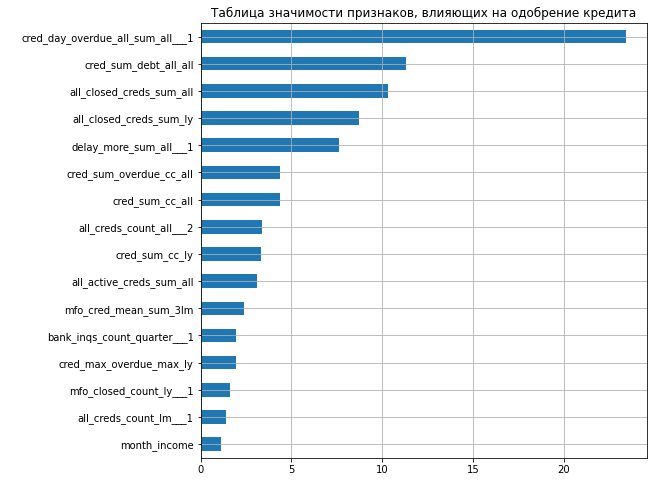

In [33]:
spisok.query('feature_importance > 1').plot(x = 'feature_names' , y='feature_importance', kind='barh', grid=True, legend=None, figsize=(8, 8)).invert_yaxis()
plt.title('Таблица значимости признаков, влияющих на одобрение кредита', fontsize=12)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show

## Таблица значимости признаков, влияющих на возвращение/просрочку кредита

In [34]:
data_bad = data.dropna()

In [35]:
features_bad = data_bad.drop(['bad','approved','order_id'], axis=1)
target_bad = data_bad['bad']

In [36]:
model_cat_bad = CatBoostClassifier(verbose=0)
model_cat_bad.fit(features_bad, target_bad)

In [37]:
feature_names = np.array(features_bad.columns)
feature_importance = np.array(model_cat_bad.get_feature_importance())
spisok_bad={'feature_names':feature_names,'feature_importance':feature_importance}
spisok_bad = pd.DataFrame(spisok_bad)
spisok_bad = spisok_bad.sort_values(by = 'feature_importance', ascending = False)
print(spisok_bad.query('feature_importance > 1'))

                 feature_names  feature_importance
6      all_closed_creds_sum_ly            8.001921
1     all_closed_creds_sum_all            6.042107
7        mfo_cred_mean_sum_3lm            6.041702
3     all_active_creds_sum_all            5.206303
0              cred_sum_cc_all            4.955952
5        cred_sum_debt_all_all            4.871012
2      cred_max_overdue_max_ly            3.951505
4               cred_sum_cc_ly            3.426591
10                month_income            3.361702
15               work_code___5            2.472988
8     cred_max_overdue_max_3lm            2.265195
231   mfo_inqs_count_month___1            1.908963
11               work_code___1            1.583475
9      cred_sum_overdue_cc_all            1.271541
4449   mfo_closed_count_ly___1            1.134656
4574    all_creds_count_lm___1            1.101415


<function matplotlib.pyplot.show>

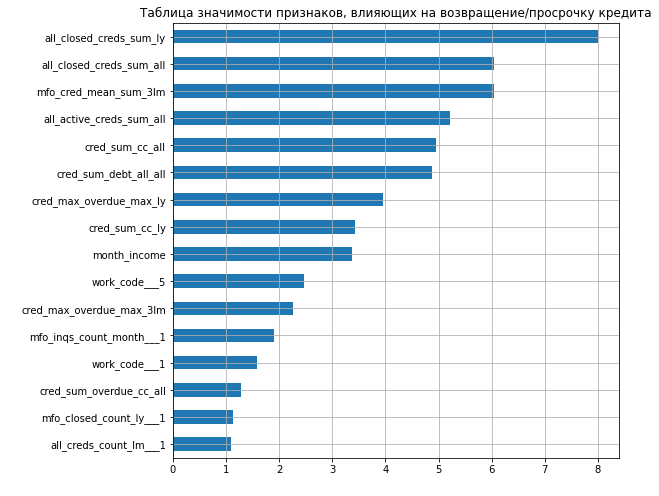

In [38]:
spisok_bad.query('feature_importance > 1').plot(x = 'feature_names' , y='feature_importance', kind='barh', grid=True, legend=None, figsize=(8, 8)).invert_yaxis()
plt.title('Таблица значимости признаков, влияющих на возвращение/просрочку кредита', fontsize=12)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show